This file is used to explore the distribution and data present in the dataset. 

Import usefull livraries, load main.csv dataset. 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

DF_PATH : str = r'../data/main.csv'

# Load the dataset
data = pd.read_csv(DF_PATH)
print("Data loaded successfully.")
print("Number of lines/columns :", data.shape)
print("Columns :", data.columns.tolist())

Data loaded successfully.
Number of lines/columns : (569, 33)
Columns : ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


Find column types, find target features, etc...

In [8]:
print("------------ Column types ------------")
print(data.dtypes)

print("All columns seems to be float32 except 'id' (int64) and 'diagnosis' (object).")

# Check uniques values of 'diagnosis' column
print("------------ Unique values in 'diagnosis' column ------------")
print(data['diagnosis'].value_counts())

------------ Column types ------------
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_wors

In diagnosis column : 
- B = benign
- M = malignant

This is the target feature (label). We have to predict this.

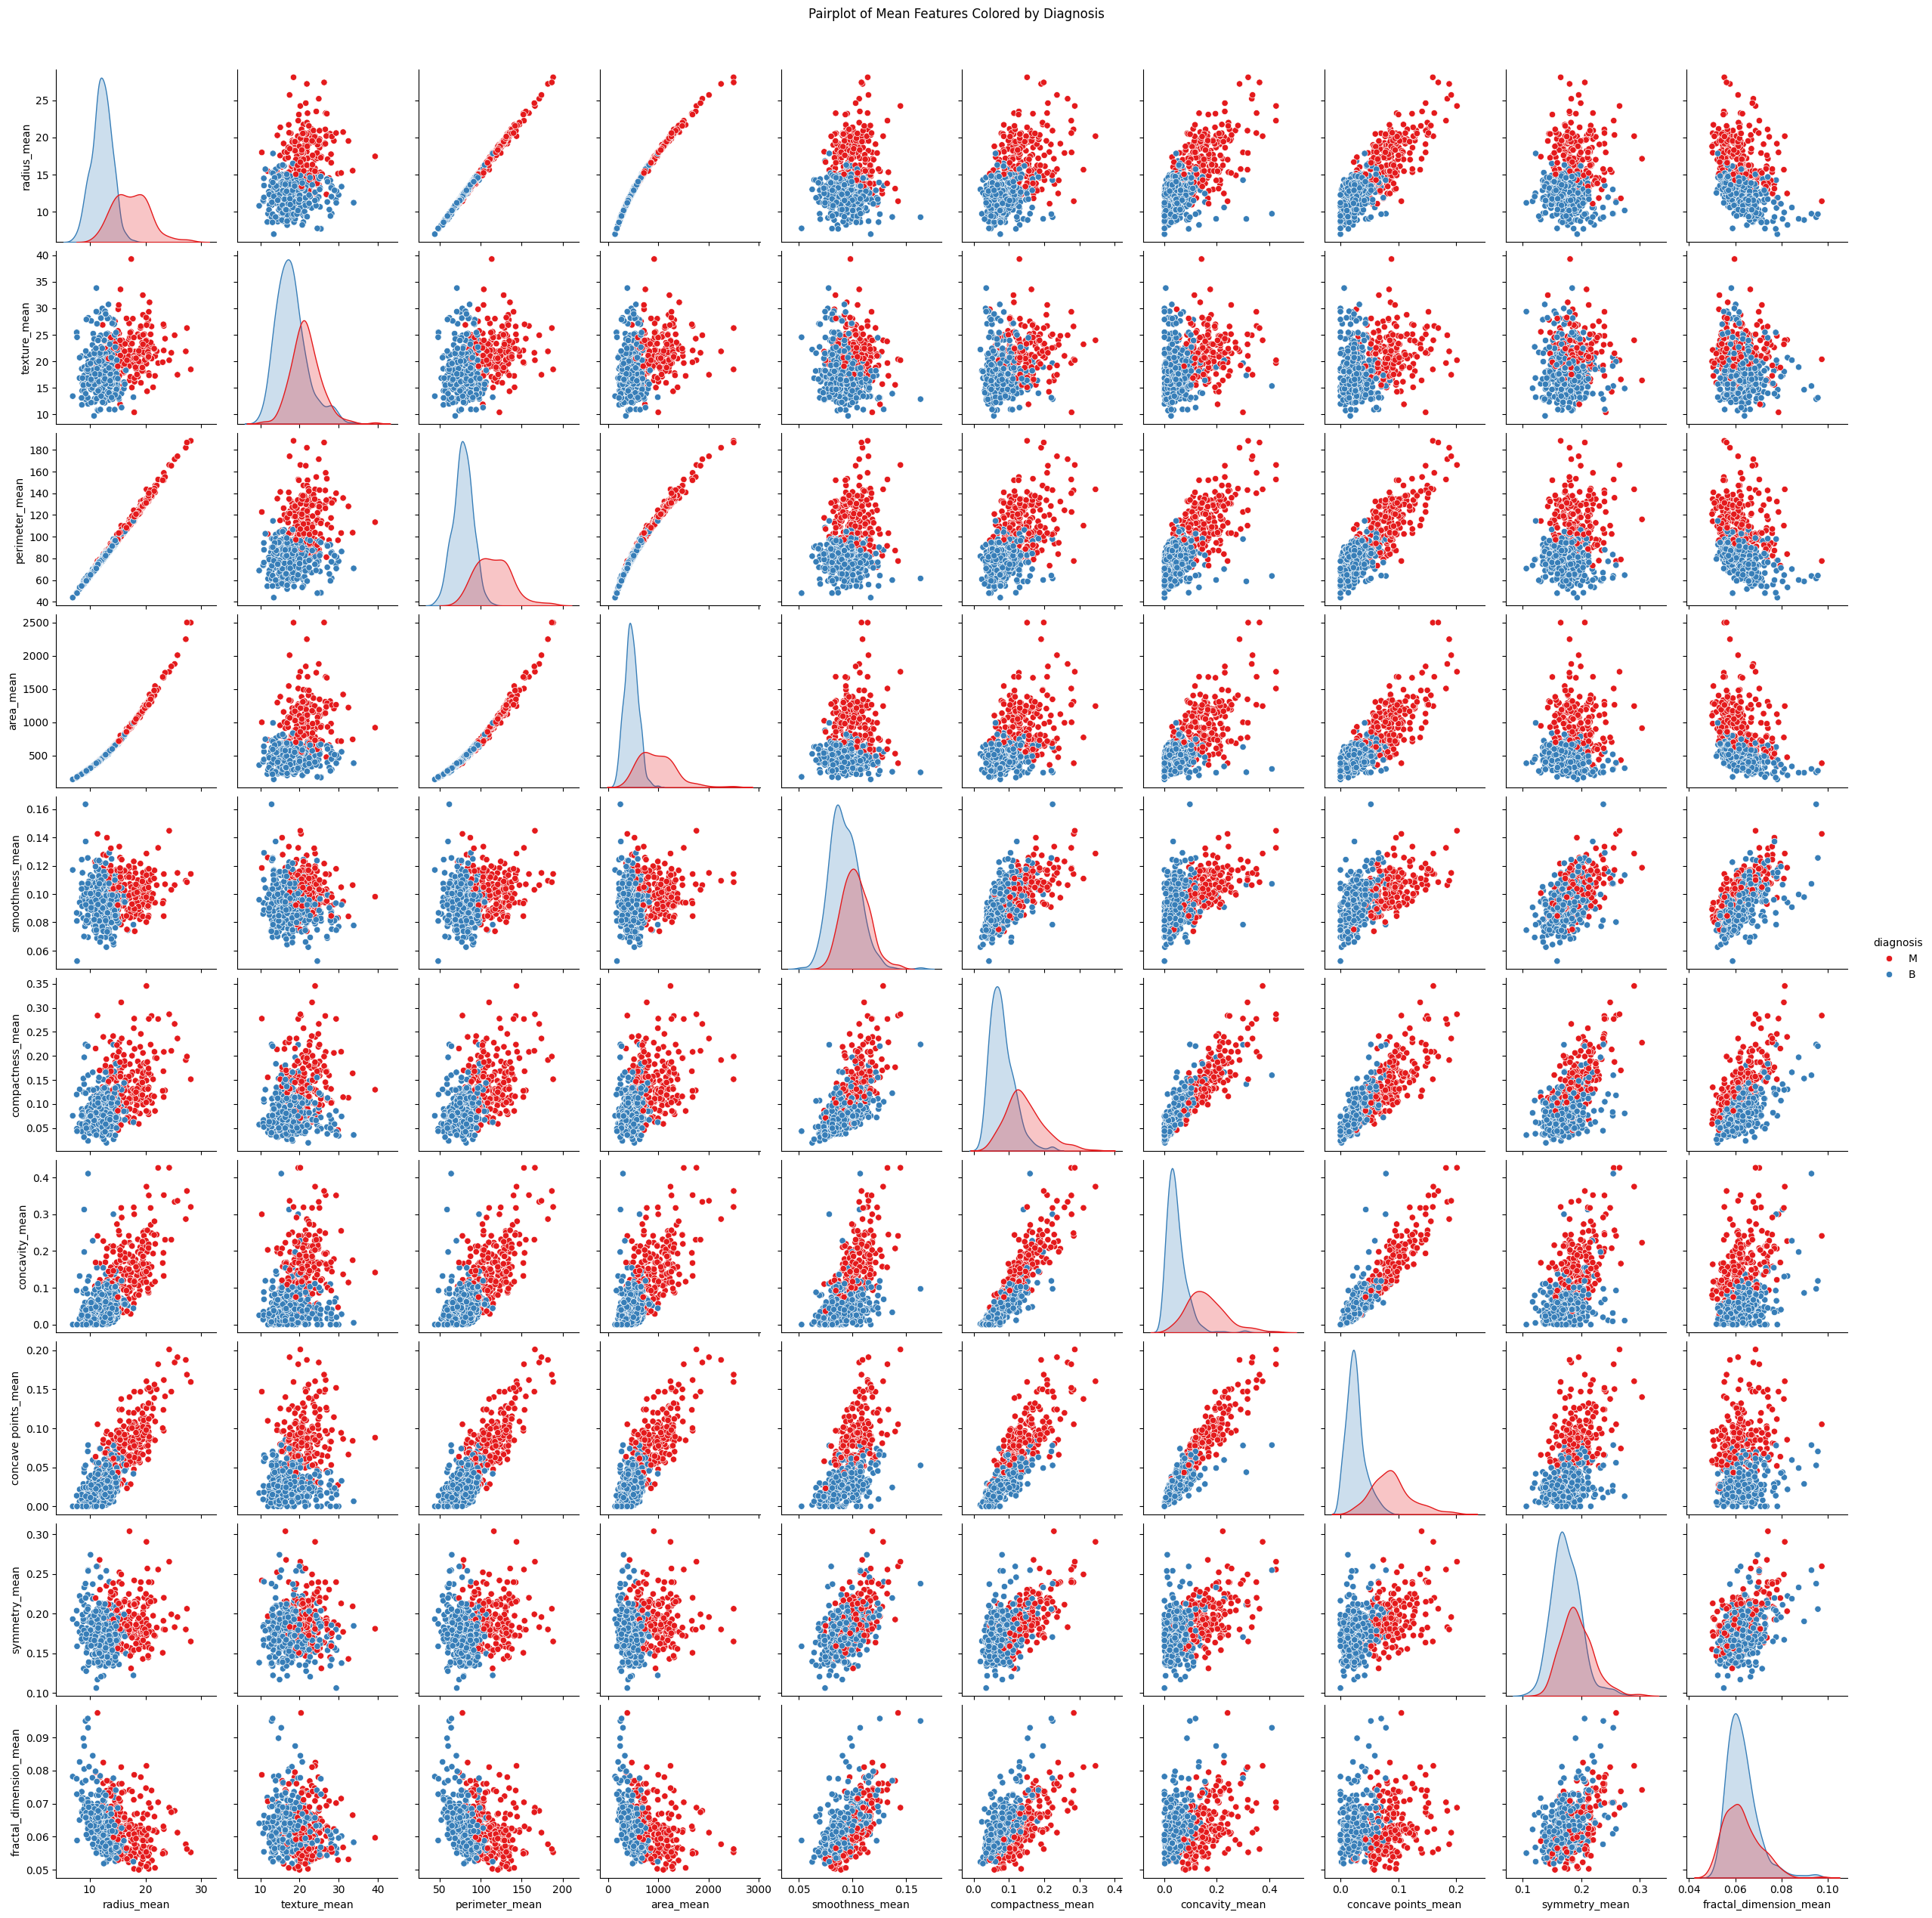

In [11]:
#pairplot for all mean features with hue as diagnosis
sns.pairplot(data, vars=data.columns[2:12], hue='diagnosis', palette='Set1')
plt.suptitle('Pairplot of Mean Features Colored by Diagnosis', y=1.02)
plt.show()
# Correlation heatmap
# plt.figure(figsize=(12, 10))
# correlation_matrix = data.corr()
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap of Features')
# plt.show()

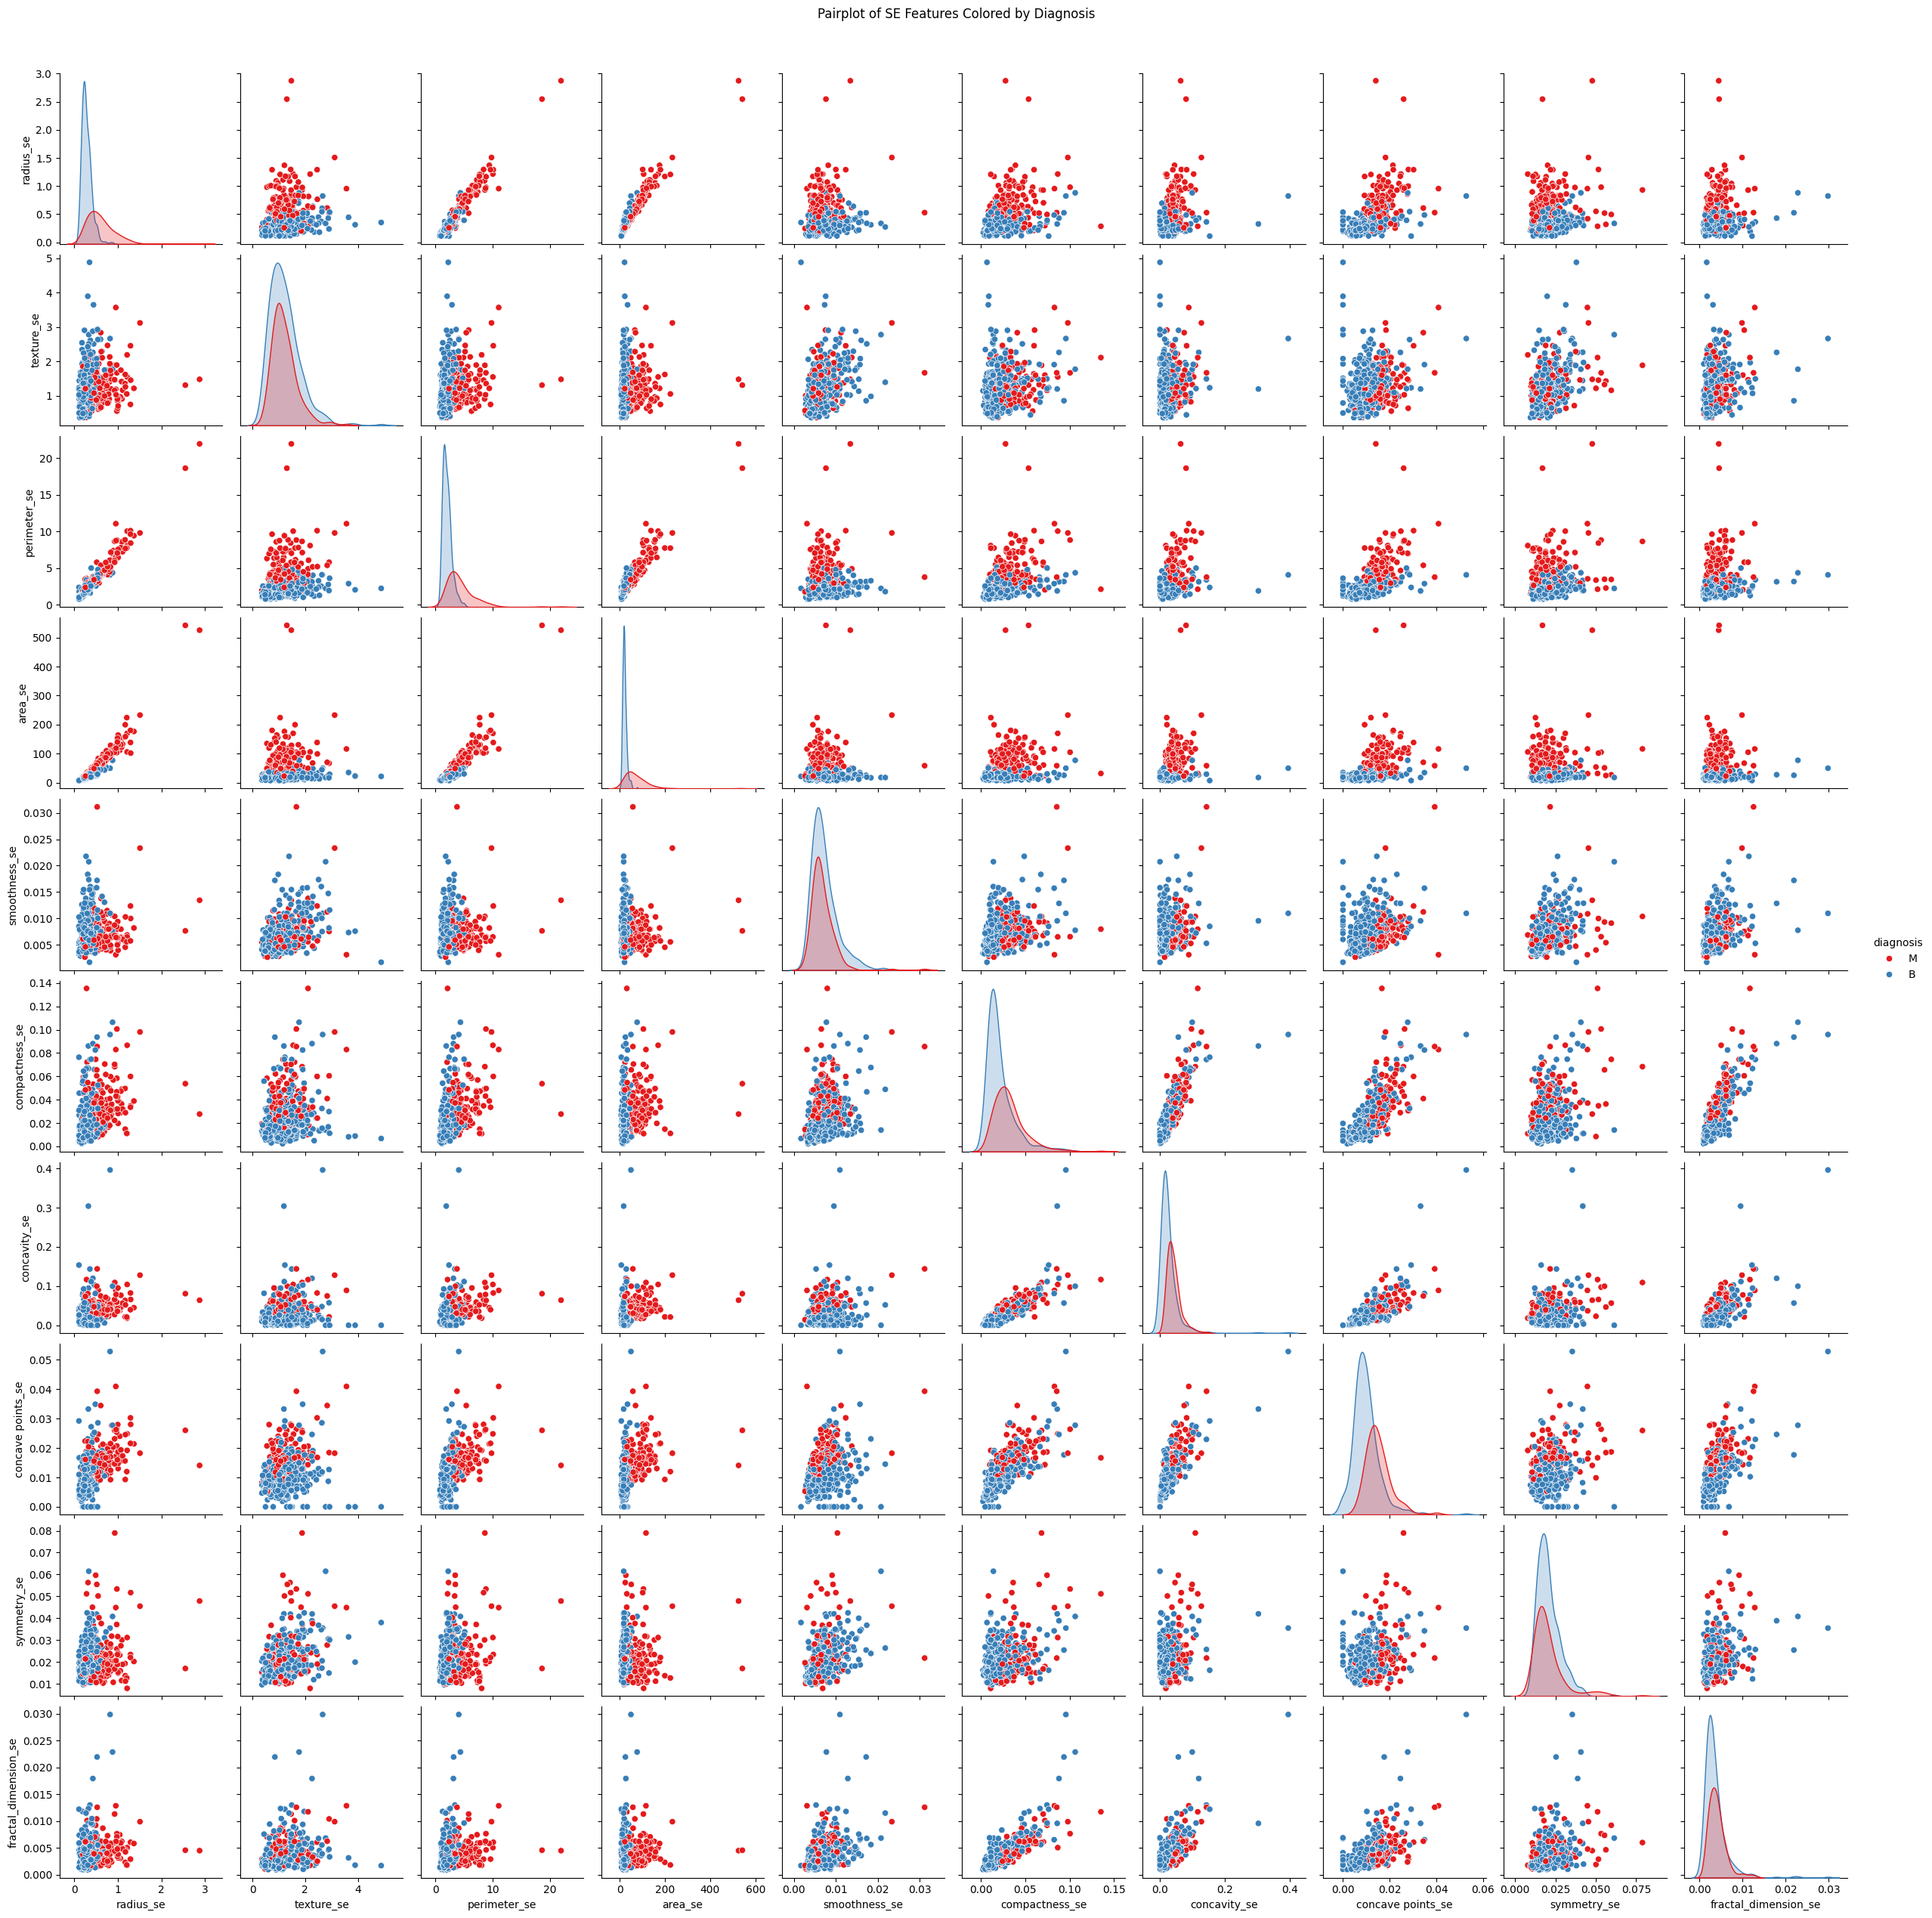

In [13]:
#pairplot for se values with hue as diagnosis
sns.pairplot(data, vars=data.columns[12:22], hue='diagnosis', palette='Set1')
plt.suptitle('Pairplot of SE Features Colored by Diagnosis', y=1.02)
plt.show()


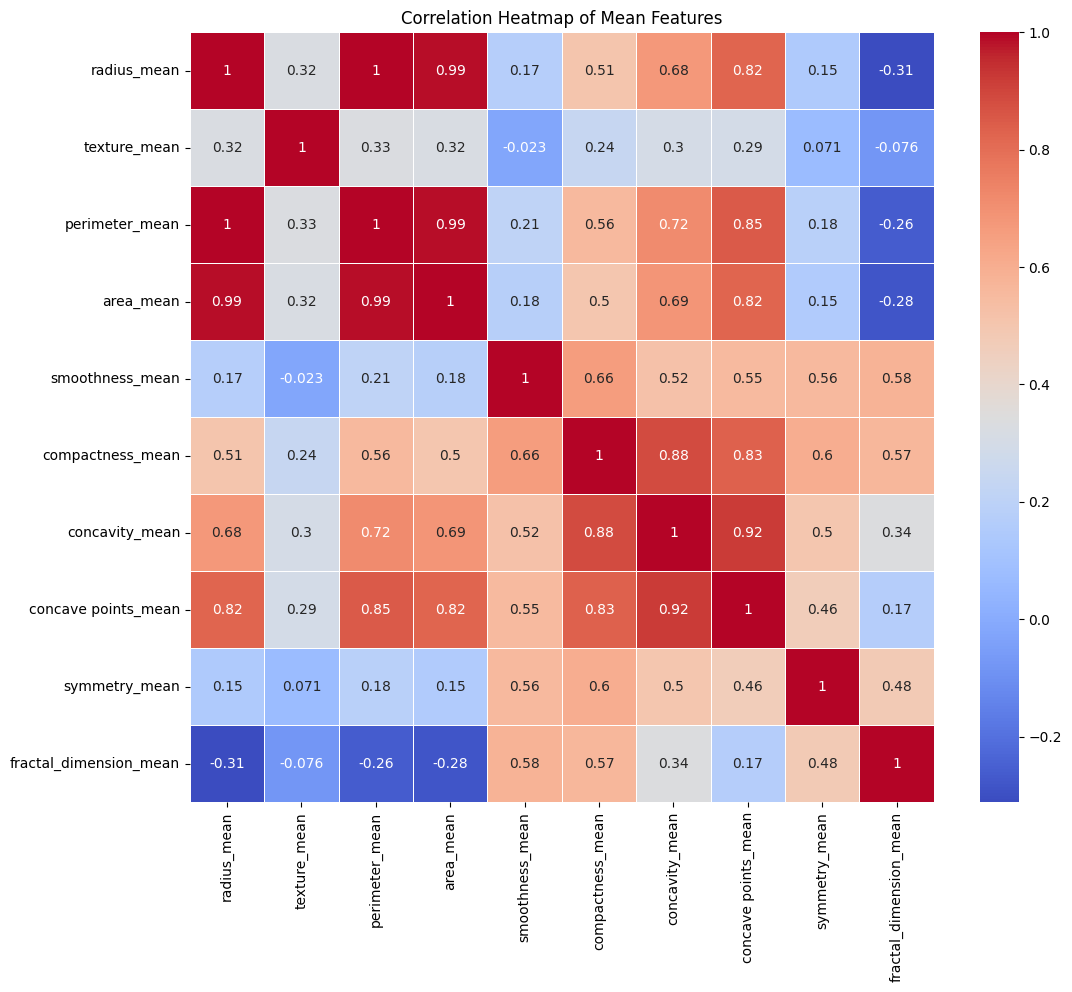

In [15]:
#first correlation matrix for all mean features with corr value in centrer of each cell
plt.figure(figsize=(12, 10))
correlation_matrix_mean = data.iloc[:, 2:12].corr()
sns.heatmap(correlation_matrix_mean, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Mean Features')
plt.show()


 First PCA : 
 Find all usefull columns and all note very usefull ones.

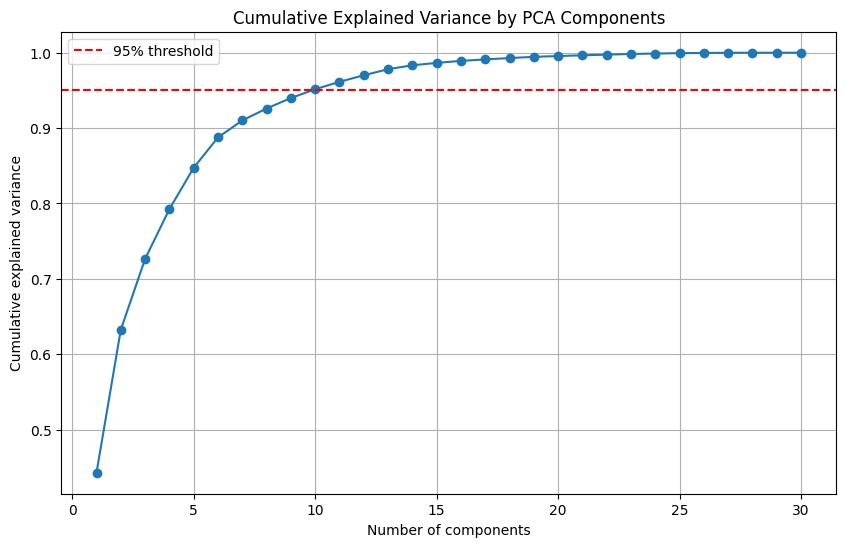

Number of components to reach 95% explained variance: 10
Feature contributions (most useful to least useful):
                    feature  contribution
14            smoothness_se      2.267692
8             symmetry_mean      2.251812
18              symmetry_se      2.223257
11               texture_se      2.164251
24         smoothness_worst      1.826701
4           smoothness_mean      1.749201
19     fractal_dimension_se      1.709789
16             concavity_se      1.707677
17        concave points_se      1.675962
28           symmetry_worst      1.656753
13                  area_se      1.603384
10                radius_se      1.492576
29  fractal_dimension_worst      1.461417
12             perimeter_se      1.447421
1              texture_mean      1.408386
26          concavity_worst      1.397141
25        compactness_worst      1.347907
9    fractal_dimension_mean      1.343680
15           compactness_se      1.264275
21            texture_worst      1.146948
0       

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop non-numeric or non-useful columns for PCA
features = data.drop(columns=['id', 'diagnosis'])

# Keep only numeric columns and drop columns with any NaN
features = features.select_dtypes(include=[np.number]).dropna(axis=1, how='any')

# Drop rows with any NaN values
features = features.dropna(axis=0, how='any')

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute cumulative explained variance
explained_cum = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_cum)+1), explained_cum, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')  # 95% variance line
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.show()

# Find the number of components required to reach 95% explained variance
n_components_95 = np.argmax(explained_cum >= 0.95) + 1
print(f"Number of components to reach 95% explained variance: {n_components_95}")

# Compute feature contributions to the selected components
# Sum absolute values of loadings for the first n_components_95 components
contributions = np.sum(np.abs(pca.components_[:n_components_95, :]), axis=0)
contribution_df = pd.DataFrame({
    'feature': features.columns,
    'contribution': contributions
}).sort_values(by='contribution', ascending=False)

# Display features ordered from most to least contributive
print("Feature contributions (most useful to least useful):")
print(contribution_df)


In [23]:
# Select and create a dataset with only the most contributive features based on PCA analysis and save it in data as PCA_selected_data.csv
top_features = contribution_df['feature'].head(10).tolist()  # Select top
selected_data = data[['id'] + ['diagnosis'] + top_features]
print("Dataset with most contributive features created.")
print("Selected features :", top_features)

selected_data.to_csv(r'../data/PCA_selected_data.csv', index=False)



Dataset with most contributive features created.
Selected features : ['smoothness_se', 'symmetry_mean', 'symmetry_se', 'texture_se', 'smoothness_worst', 'smoothness_mean', 'fractal_dimension_se', 'concavity_se', 'concave points_se', 'symmetry_worst']
